# Diagnostics: Overlap and Effective Sample Size

We compute overlap diagnostics and visualize effective sample size to assess
weight stability before trusting OPE estimates.

In [1]:
from __future__ import annotations

from pathlib import Path

import numpy as np

from crl.benchmarks.mdp_synth import SyntheticMDP, SyntheticMDPConfig
from crl.estimators.utils import compute_action_probs
from crl.viz import configure_notebook_display, save_figure
from crl.viz.plots import plot_effective_sample_size, plot_overlap_diagnostics

In [2]:
np.random.seed(0)
configure_notebook_display()

benchmark = SyntheticMDP(SyntheticMDPConfig(seed=3, horizon=6))
dataset = benchmark.sample(num_trajectories=400, seed=4)

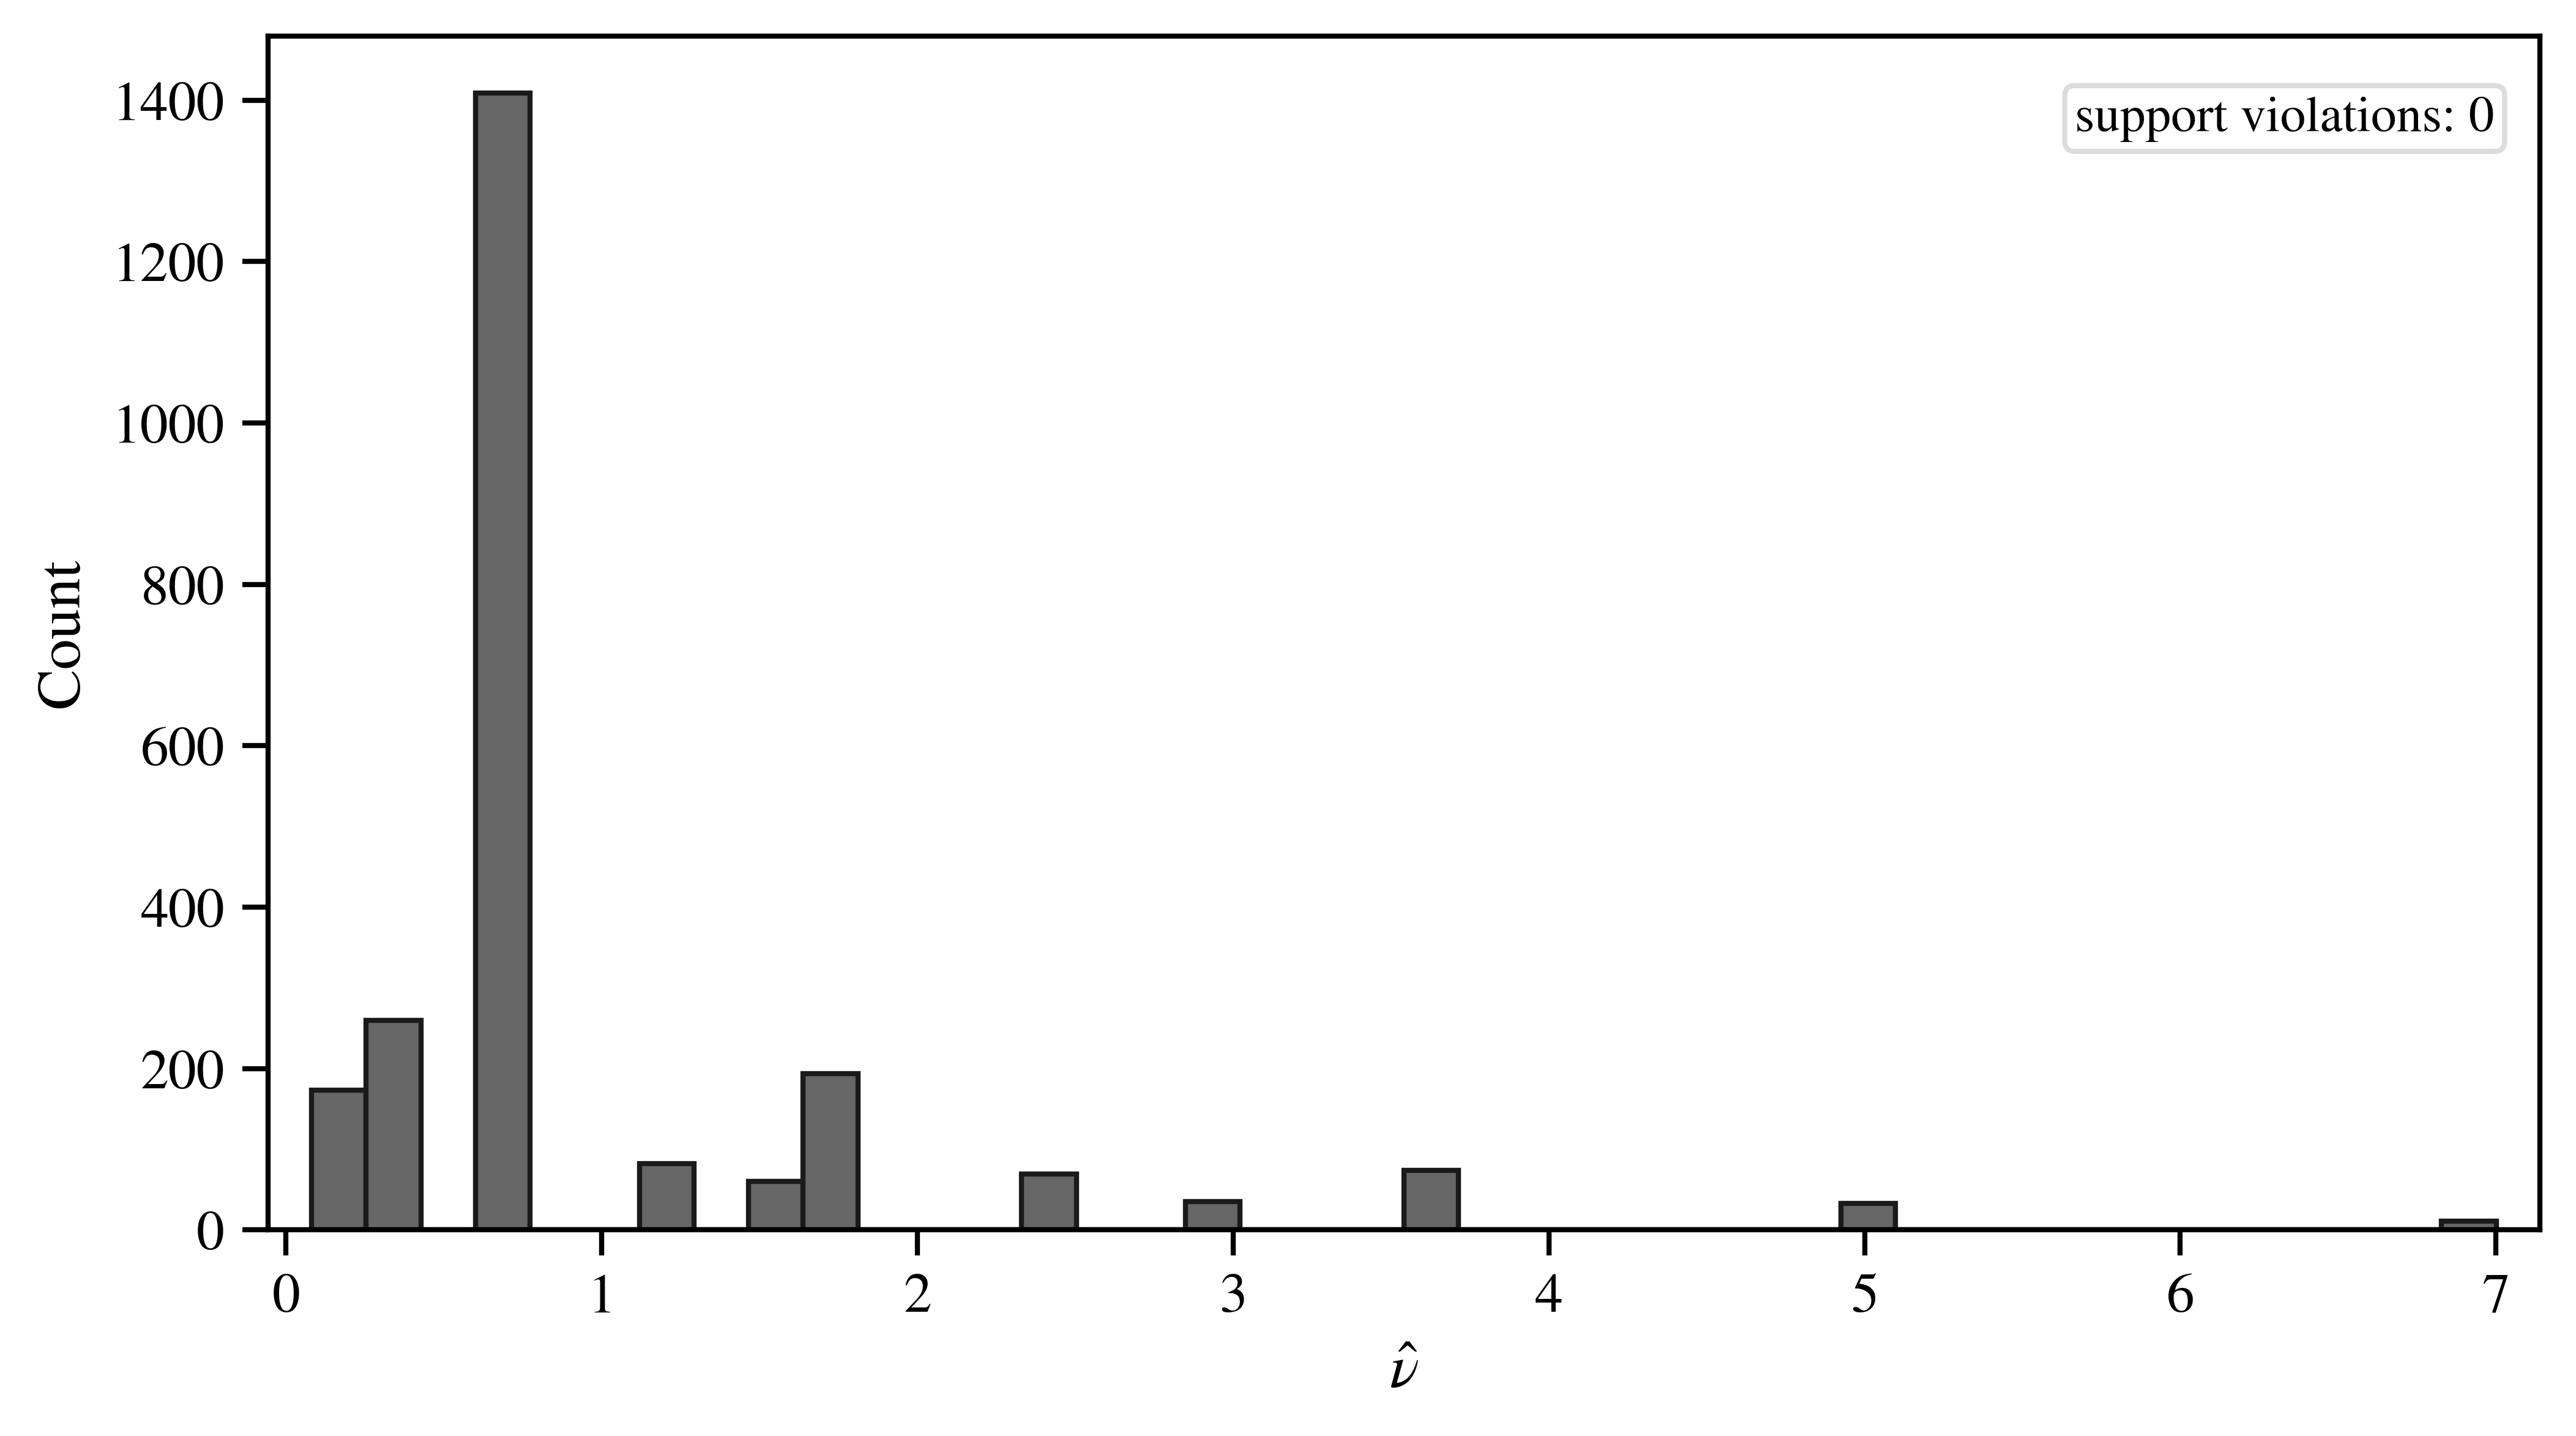

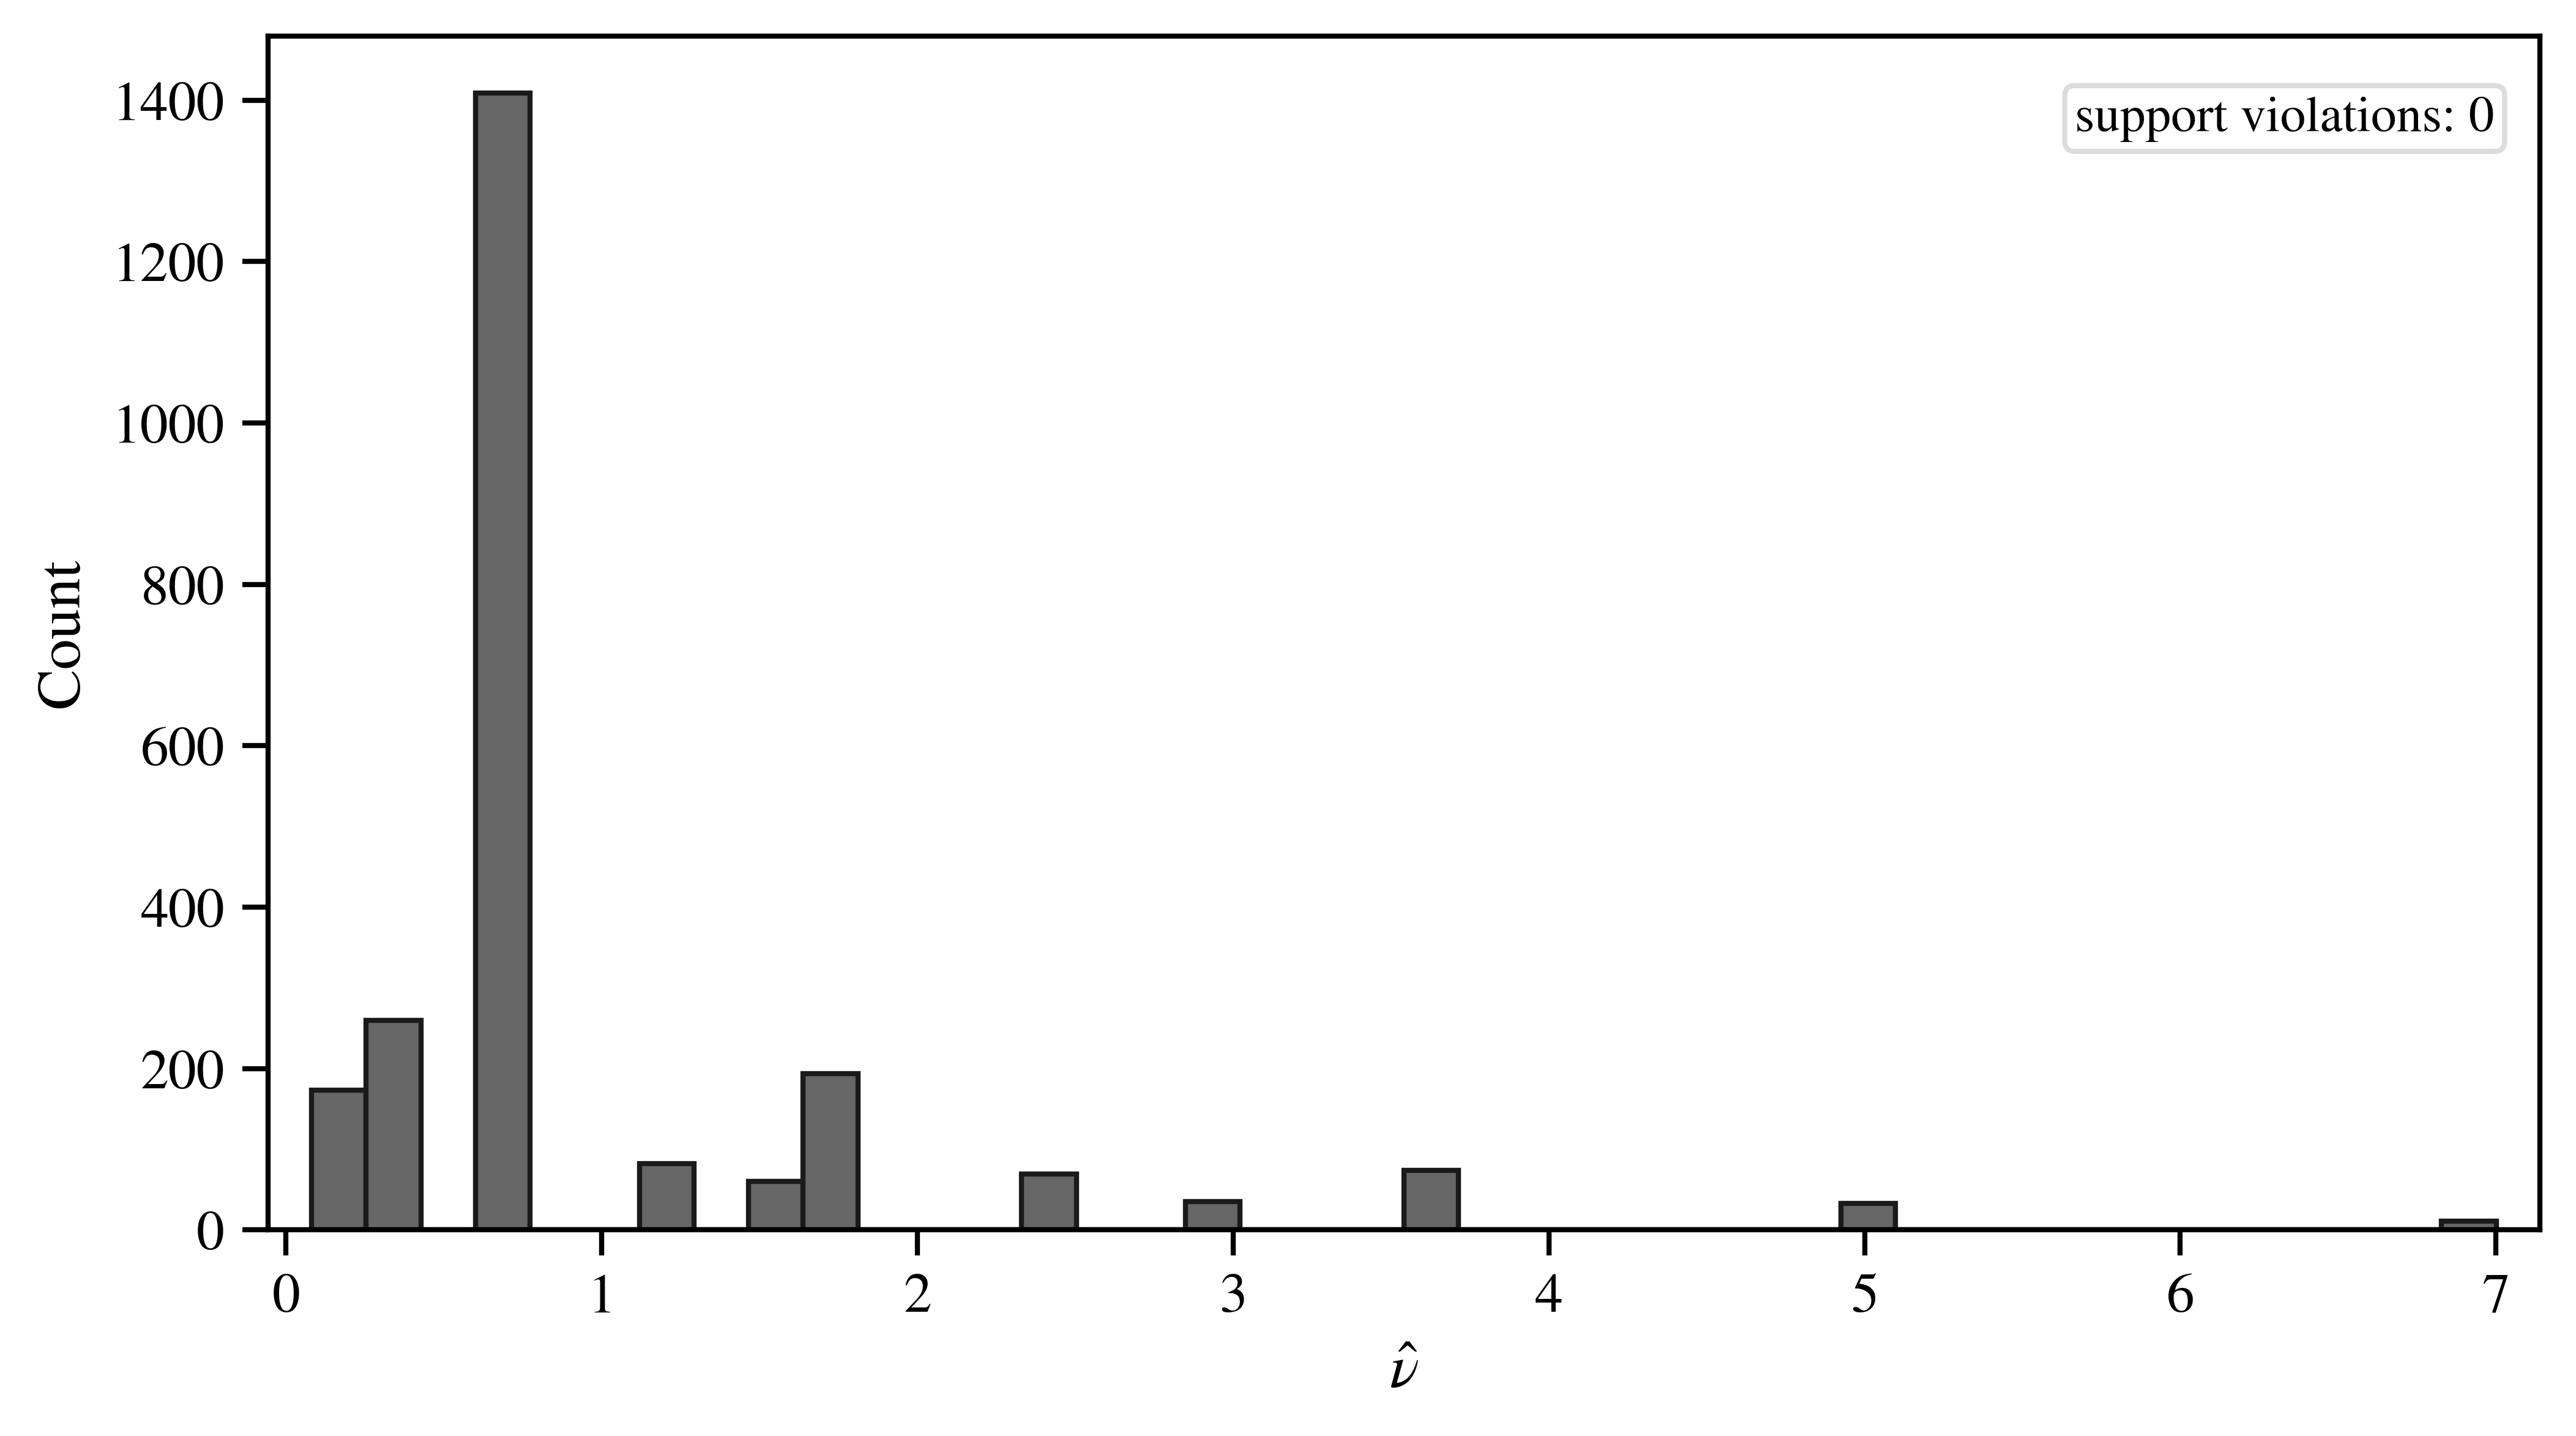

In [3]:
target_probs = compute_action_probs(
    benchmark.target_policy, dataset.observations, dataset.actions
)
ratios = np.where(
    dataset.mask, target_probs / dataset.behavior_action_probs, 1.0
)
weights = np.prod(ratios, axis=1)

fig_overlap = plot_overlap_diagnostics(
    target_probs, dataset.behavior_action_probs, mask=dataset.mask
)
fig_overlap

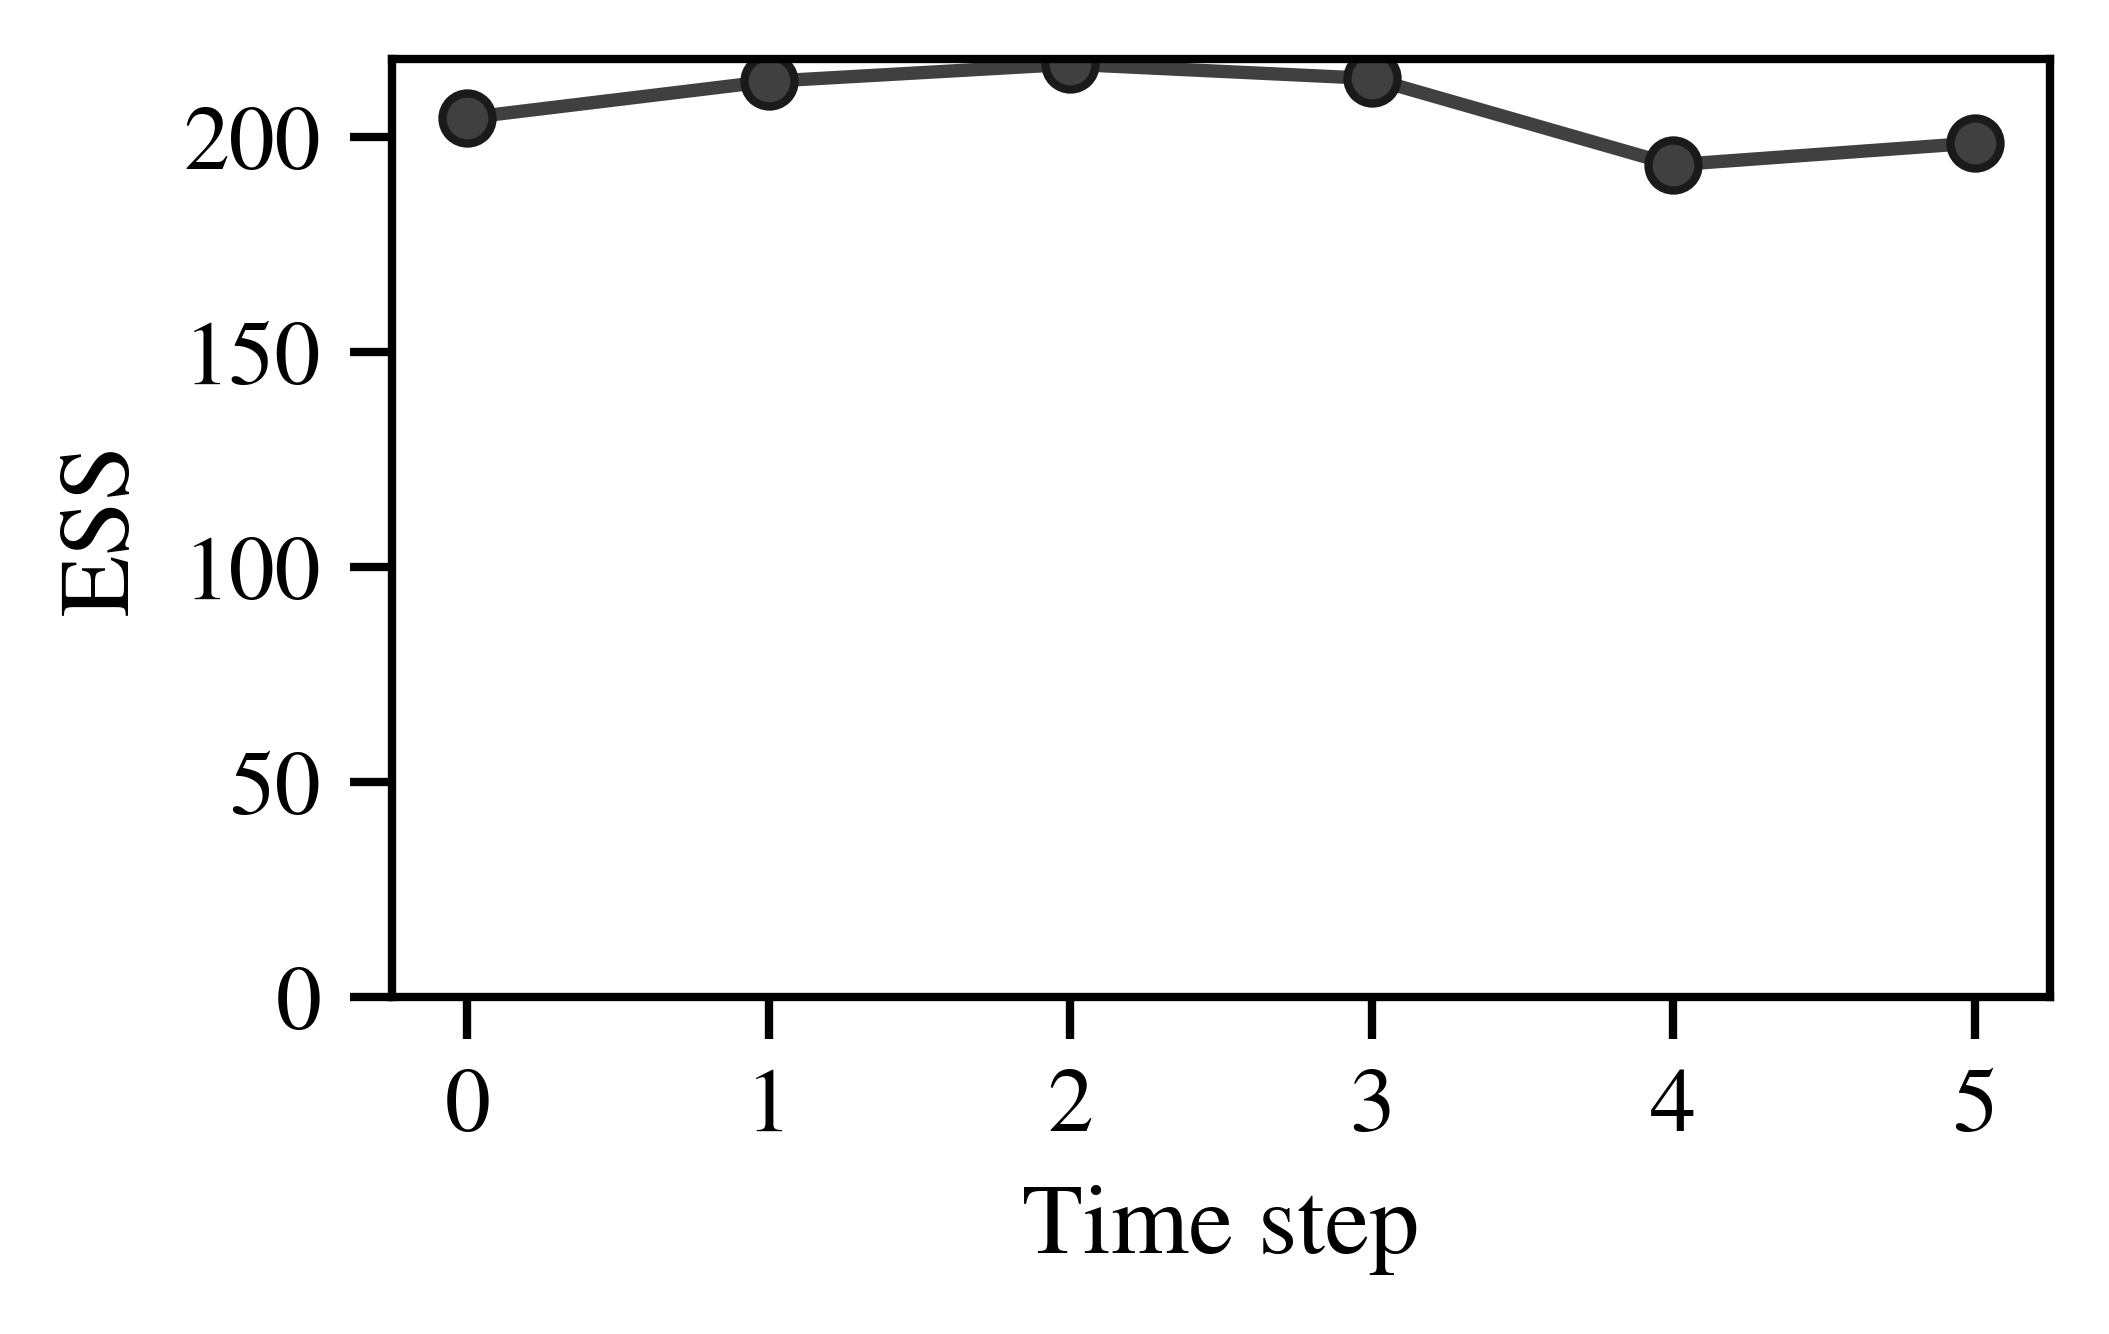

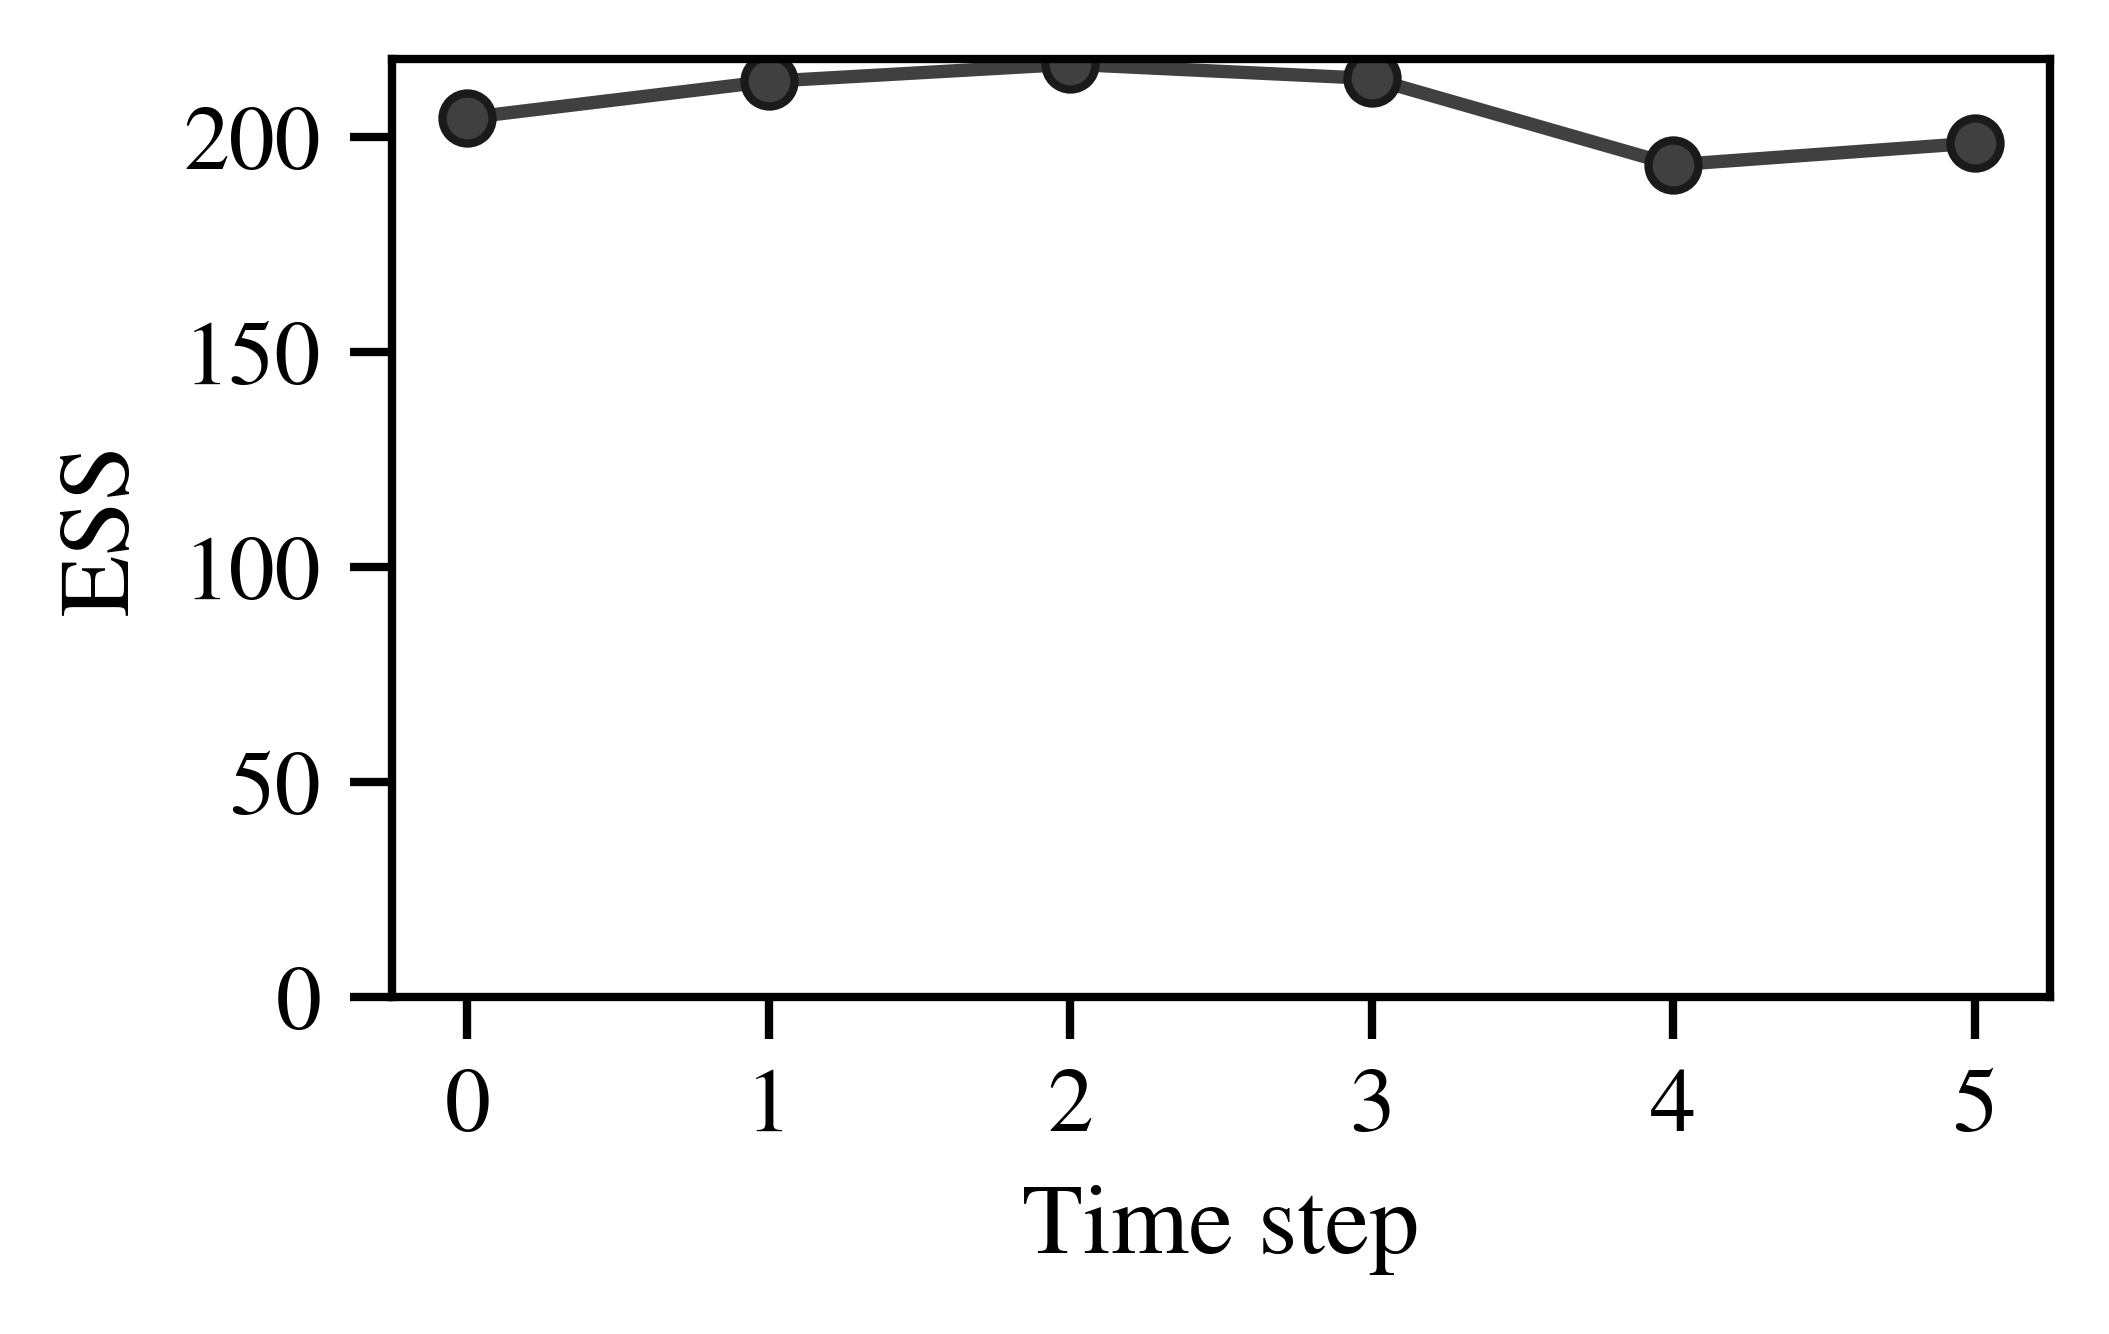

In [4]:
fig_ess = plot_effective_sample_size(ratios, by_time=True)
fig_ess

In [5]:
output_dir = Path("docs/assets/figures")
output_dir.mkdir(parents=True, exist_ok=True)
save_figure(fig_overlap, output_dir / "diagnostics_overlap")
save_figure(fig_ess, output_dir / "diagnostics_ess")

{'pdf': 'docs/assets/figures/diagnostics_ess.pdf',
 'png': 'docs/assets/figures/diagnostics_ess.png'}